```Python
from google.colab import drive

drive.mount('/content/drive')
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings


# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# y data profiling
from ydata_profiling import ProfileReport

In [3]:
cc_data = pd.read_csv("risk_factors_cervical_cancer.csv")

In [4]:
pd.set_option('display.max_columns', None)
cc_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
pd.Series({c: cc_data[c].unique() for c in cc_data})

Age                                   [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 4...
Number of sexual partners             [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, ?, 7.0, 15.0, 8...
First sexual intercourse              [15.0, 14.0, ?, 16.0, 21.0, 23.0, 17.0, 26.0, ...
Num of pregnancies                    [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, ?, 8.0, 7.0, 0....
Smokes                                                                    [0.0, 1.0, ?]
Smokes (years)                        [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, ?, 1...
Smokes (packs/year)                   [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4,...
Hormonal Contraceptives                                                   [0.0, 1.0, ?]
Hormonal Contraceptives (years)       [0.0, 3.0, 15.0, 2.0, 8.0, 10.0, 5.0, 0.25, 7....
IUD                                                                       [0.0, 1.0, ?]
IUD (years)                           [0.0, 7.0, ?, 5.0, 8.0, 6.0, 1.0, 0.58, 2.0, 1...
STDs                            

In [7]:
val_lst = []
for i in cc_data.columns:
  val = cc_data[i][cc_data[i] == '?'].count()
  val_lst.append(val)
  ## val = 0

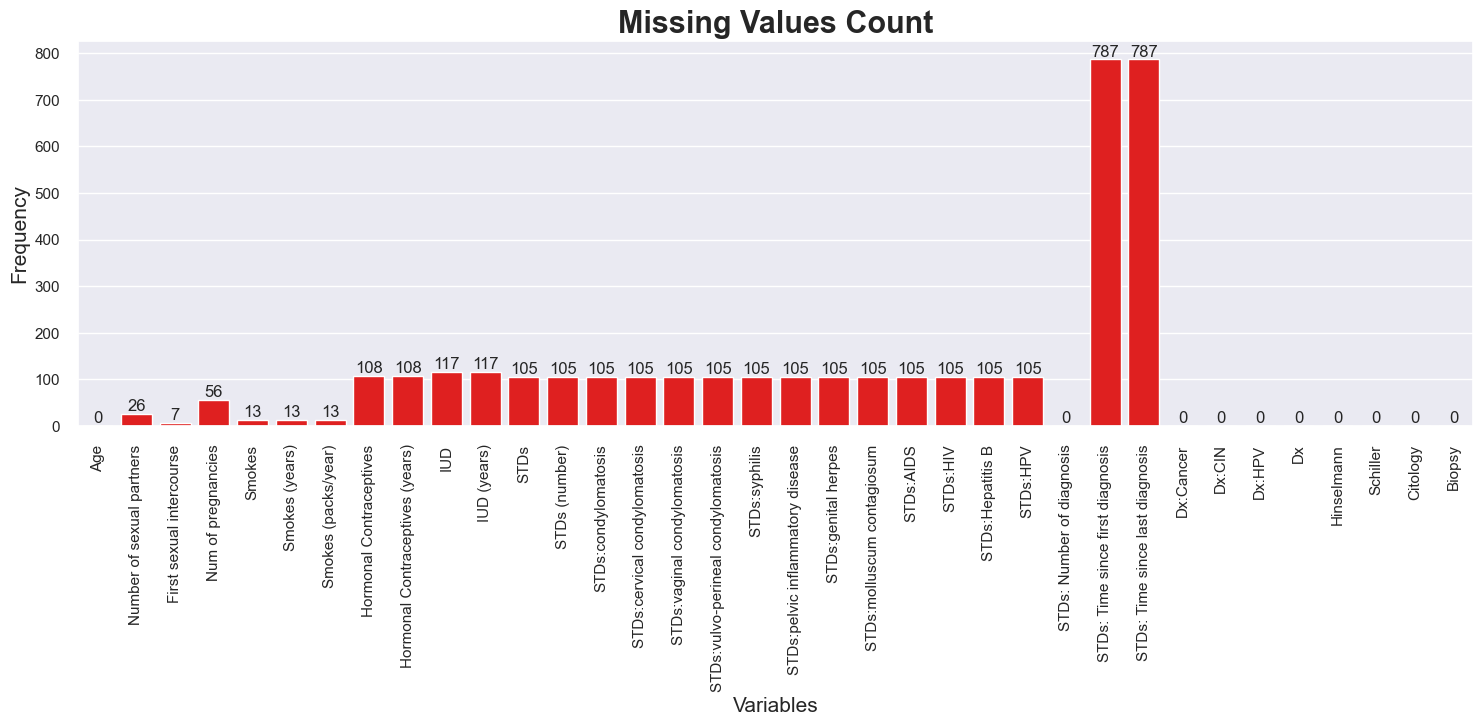

In [70]:
fig = sns.barplot(x = cc_data.columns, y = val_lst, color = "red")
sns.set(rc={"figure.figsize":(18, 5)})
fig.set_title('Missing Values Count', fontdict={'size': 22, 'weight': 'bold'})
fig.set_xlabel('Variables', fontdict={'size': 15})
fig.set_ylabel('Frequency', fontdict={'size': 15})

for item in fig.get_xticklabels():
    item.set_rotation(90)

fig.bar_label(fig.containers[0]);

In [72]:
fig.containers

[<BarContainer object of 36 artists>]

In [9]:
f = pd.get_dummies(
    cc_data, prefix='', prefix_sep='', dummy_na=True
 ).groupby(level=0, axis=1).sum()  # Sum the *counts* for each column.
f

,0.0,0.001,0.003,0.025,0.04,0.05,0.08,0.1,0.15,0.16,0.17,0.2,0.25,0.3,0.32,0.33,0.37,0.4,0.41,0.42,0.45,0.5,0.5132021277,0.58,0.66,0.67,0.7,0.75,0.8,0.9,0.91,1.0,1.2,1.25,1.266972909,1.3,1.35,1.4,1.5,1.6,1.65,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,2.0,2.1,2.2,2.25,2.282200521,2.4,2.5,2.6,2.7,2.75,2.8,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,3.0,3.3,3.4,3.5,30.0,32.0,34.0,37.0,4.0,4.5,4.8,5.0,5.5,5.7,6.0,6.5,7.0,7.5,7.6,8.0,9.0,?,Age,Biopsy,Citology,Dx,Dx:CIN,Dx:Cancer,Dx:HPV,Hinselmann,STDs: Number of diagnosis,Schiller,nan
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,18,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,15,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,34,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,2,52,0,0,0,0,1,1,0,0,0,0
4,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,46,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,34,0,0,0,0,0,0,0,0,0,0
854,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,32,0,0,0,0,0,0,0,0,0,0
855,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,25,0,1,0,0,0,0,0,0,0,0
856,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,33,0,0,0,0,0,0,0,0,0,0


In [10]:
f['?'].unique()

array([ 2,  3,  5,  0, 22, 20,  6, 23,  1, 21, 18,  4, 16,  9,  7, 19],
      dtype=int64)

In [11]:
em = f[f["?"] >= 15]
em

,0.0,0.001,0.003,0.025,0.04,0.05,0.08,0.1,0.15,0.16,0.17,0.2,0.25,0.3,0.32,0.33,0.37,0.4,0.41,0.42,0.45,0.5,0.5132021277,0.58,0.66,0.67,0.7,0.75,0.8,0.9,0.91,1.0,1.2,1.25,1.266972909,1.3,1.35,1.4,1.5,1.6,1.65,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,2.0,2.1,2.2,2.25,2.282200521,2.4,2.5,2.6,2.7,2.75,2.8,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,3.0,3.3,3.4,3.5,30.0,32.0,34.0,37.0,4.0,4.5,4.8,5.0,5.5,5.7,6.0,6.5,7.0,7.5,7.6,8.0,9.0,?,Age,Biopsy,Citology,Dx,Dx:CIN,Dx:Cancer,Dx:HPV,Hinselmann,STDs: Number of diagnosis,Schiller,nan
71,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,34,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,35,0,0,0,0,0,0,0,0,0,0
90,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,20,36,0,0,0,0,0,0,0,0,0,0
95,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,20,31,0,0,0,0,0,0,0,0,0,0
98,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,20,31,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,20,23,0,0,0,0,0,0,0,0,0,0
794,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,20,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,19,36,0,0,0,0,0,0,0,0,0,0
814,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,16,1,0,0,0,0,0,0,0,0,0


In [12]:
high_missing_index = list(em.index)

In [13]:
cc_data.loc[high_missing_index]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
71,34,?,?,3.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
74,35,2.0,17.0,2.0,1.0,15.0,0.32,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
90,36,1.0,13.0,6.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
95,31,4.0,16.0,2.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
98,31,1.0,20.0,5.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,23,3.0,15.0,1.0,1.0,5.0,0.75,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
794,20,2.0,16.0,1.0,0.0,0.0,0.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
807,36,2.0,18.0,?,1.0,19.0,7.6,1.0,8.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
814,16,1.0,12.0,?,0.0,0.0,0.0,1.0,0.42,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,1


In [14]:
demo_cc_data = cc_data.drop(index = high_missing_index)

This is the dataframe after deleting the rows with excess missing values.

In [15]:
demo_cc_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


**Defining Age Groups Column**

In [16]:
def checkAgeRange(age):
    las_dig = age%10
    range_age = str.format('{0}-{1}',age-las_dig,((age-las_dig)+10))
    return range_age

d = demo_cc_data['Age']

demo_cc_data['AgeGroup'] = demo_cc_data['Age'].apply(checkAgeRange)

age_grp_col = demo_cc_data['AgeGroup']

demo_cc_data.insert(loc = 1,
          column = 'Age Group',
          value = age_grp_col)

demo_cc_data.drop(['AgeGroup'], axis=1, inplace = True)

In [17]:
demo_cc_data

,Age,Age Group,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,10-20,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,10-20,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,30-40,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,50-60,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,40-50,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,30-40,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,30-40,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,20-30,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,30-40,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [18]:
cancer_df = demo_cc_data.replace('?', np.NaN)

In [19]:
cancer_df.isna().sum()

Age                                     0
Age Group                               0
Number of sexual partners              14
First sexual intercourse                6
Num of pregnancies                     47
Smokes                                 10
Smokes (years)                         10
Smokes (packs/year)                    10
Hormonal Contraceptives                13
Hormonal Contraceptives (years)        13
IUD                                    16
IUD (years)                            16
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                          

#### Detecting mode values of each 'object' - type column.
**Then we replace its NaN values by the mode.**

In [20]:
cancer_df["Smokes (packs/year)"].value_counts()
cancer_df["Smokes (packs/year)"].mode()

0.0             636
0.5132021277     13
1.0               6
2.0               4
3.0               4
0.1               3
0.75              3
1.2               3
5.0               3
0.2               3
0.05              3
6.0               3
1.35              2
12.0              2
0.16              2
2.4               2
8.0               2
1.4               2
9.0               2
2.8               2
3.5               2
7.0               2
1.6               2
0.8               2
0.001             1
0.4               1
4.5               1
5.5               1
4.8               1
0.37              1
1.65              1
2.2               1
0.9               1
1.3               1
0.25              1
0.5               1
2.5               1
2.7               1
4.0               1
22.0              1
1.25              1
0.15              1
0.45              1
3.4               1
0.04              1
19.0              1
21.0              1
2.6               1
15.0              1
3.3               1


0    0.0
Name: Smokes (packs/year), dtype: object

In [21]:
cancer_df['Number of sexual partners'] = cancer_df['Number of sexual partners'].fillna(int(float(cancer_df["Number of sexual partners"].mode().values[0])))
cancer_df['First sexual intercourse'] = cancer_df['First sexual intercourse'].fillna(int(float(cancer_df["First sexual intercourse"].mode().values[0])))
cancer_df['Num of pregnancies'] = cancer_df['Num of pregnancies'].fillna(int(float(cancer_df["Num of pregnancies"].mode().values[0])))
cancer_df['Smokes'] = cancer_df['Smokes'].fillna(int(float(cancer_df["Smokes"].mode().values[0])))
cancer_df['Smokes (years)'] = cancer_df['Smokes (years)'].fillna(int(float(cancer_df["Smokes (years)"].mode().values[0])))
cancer_df['Smokes (packs/year)'] = cancer_df['Smokes (packs/year)'].fillna(int(float(cancer_df["Smokes (packs/year)"].mode().values[0])))
cancer_df['Hormonal Contraceptives'] = cancer_df['Hormonal Contraceptives'].fillna(int(float(cancer_df["Hormonal Contraceptives"].mode().values[0])))
cancer_df['Hormonal Contraceptives (years)'] = cancer_df['Hormonal Contraceptives (years)'].fillna(int(float(cancer_df["Hormonal Contraceptives (years)"].mode().values[0])))
cancer_df['IUD'] = cancer_df['IUD'].fillna(int(float(cancer_df["IUD"].mode().values[0])))
cancer_df['IUD (years)'] = cancer_df['IUD (years)'].fillna(int(float(cancer_df["IUD (years)"].mode().values[0])))

**Converting object type to int32**

In [22]:
cancer_df["Num of pregnancies"] = pd.to_numeric(cancer_df["Num of pregnancies"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Number of sexual partners"] = pd.to_numeric(cancer_df["Number of sexual partners"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["First sexual intercourse"] = pd.to_numeric(cancer_df["First sexual intercourse"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Smokes (years)"] = pd.to_numeric(cancer_df["Smokes (years)"].astype(str).str.replace(',',''), errors='coerce').astype(int)

cancer_df["Smokes"] = pd.to_numeric(cancer_df["Smokes"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Smokes (packs/year)"] = pd.to_numeric(cancer_df["Smokes (packs/year)"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Hormonal Contraceptives"] = pd.to_numeric(cancer_df["Hormonal Contraceptives"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["Hormonal Contraceptives (years)"] = pd.to_numeric(cancer_df["Hormonal Contraceptives (years)"].astype(str).str.replace(',',''), errors='coerce').astype(int)

cancer_df["IUD"] = pd.to_numeric(cancer_df["IUD"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["IUD (years)"] = pd.to_numeric(cancer_df["IUD (years)"].astype(str).str.replace(',',''), errors='coerce').astype(int)

cancer_df["STDs"] = pd.to_numeric(cancer_df["STDs"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs (number)"] = pd.to_numeric(cancer_df["STDs (number)"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:condylomatosis"] = pd.to_numeric(cancer_df["STDs:condylomatosis"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:cervical condylomatosis"] = pd.to_numeric(cancer_df["STDs:cervical condylomatosis"].astype(str).str.replace(',',''), errors='coerce').astype(int)

cancer_df["STDs:vaginal condylomatosis"] = pd.to_numeric(cancer_df["STDs:vaginal condylomatosis"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:vulvo-perineal condylomatosis"] = pd.to_numeric(cancer_df["STDs:vulvo-perineal condylomatosis"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:syphilis"] = pd.to_numeric(cancer_df["STDs:syphilis"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:pelvic inflammatory disease"] = pd.to_numeric(cancer_df["STDs:pelvic inflammatory disease"].astype(str).str.replace(',',''), errors='coerce').astype(int)

cancer_df["STDs:genital herpes"] = pd.to_numeric(cancer_df["STDs:genital herpes"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:molluscum contagiosum"] = pd.to_numeric(cancer_df["STDs:molluscum contagiosum"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:AIDS"] = pd.to_numeric(cancer_df["STDs:AIDS"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:HIV"] = pd.to_numeric(cancer_df["STDs:HIV"].astype(str).str.replace(',',''), errors='coerce').astype(int)

cancer_df["STDs:Hepatitis B"] = pd.to_numeric(cancer_df["STDs:Hepatitis B"].astype(str).str.replace(',',''), errors='coerce').astype(int)
cancer_df["STDs:HPV"] = pd.to_numeric(cancer_df["STDs:HPV"].astype(str).str.replace(',',''), errors='coerce').astype(int)
#cancer_df["STDs: Time since first diagnosis"] = pd.to_numeric(cancer_df["STDs: Time since first diagnosis"].astype(str).str.replace(',',''), errors='coerce').astype(int)
#cancer_df["STDs: Time since last diagnosis"] = pd.to_numeric(cancer_df["STDs: Time since last diagnosis"].astype(str).str.replace(',',''), errors='coerce').astype(int)


In [23]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 753 non-null    int64 
 1   Age Group                           753 non-null    object
 2   Number of sexual partners           753 non-null    int32 
 3   First sexual intercourse            753 non-null    int32 
 4   Num of pregnancies                  753 non-null    int32 
 5   Smokes                              753 non-null    int32 
 6   Smokes (years)                      753 non-null    int32 
 7   Smokes (packs/year)                 753 non-null    int32 
 8   Hormonal Contraceptives             753 non-null    int32 
 9   Hormonal Contraceptives (years)     753 non-null    int32 
 10  IUD                                 753 non-null    int32 
 11  IUD (years)                         753 non-null    int32 

In [24]:
#cancer_df.drop(['Number of sexual partners)'], axis=1, inplace=True)

In [25]:
cancer_df

,Age,Age Group,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,10-20,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,10-20,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,30-40,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,50-60,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,40-50,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,30-40,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,30-40,2,19,1,0,0,0,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,20-30,2,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,30-40,2,24,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [26]:
#profile = ProfileReport(cancer_df, title="Profiling Report")
#profile.to_notebook_iframe()

In [27]:
#select only the numeric columns in the DataFrame
cancer_df.select_dtypes(include=np.number)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
854,32,2,19,1,0,0,0,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
855,25,2,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
856,33,2,24,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Create correlation matrix
corr_mat = cancer_df.select_dtypes(include=np.number).corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending=False)  
sorted_mat_df = pd.DataFrame(sorted_mat)
sorted_mat_df.columns = ["Corr"]
#sorted_mat_df
sorted_mat_df[(sorted_mat_df['Corr'] >= 0.5) & (sorted_mat_df['Corr'] < 1)].iloc[[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43], :]

,,Corr
STDs:vulvo-perineal condylomatosis,STDs:condylomatosis,0.987875
STDs,STDs (number),0.918609
STDs: Number of diagnosis,STDs,0.906662
STDs (number),STDs:condylomatosis,0.899521
STDs: Number of diagnosis,STDs (number),0.897233
STDs:vulvo-perineal condylomatosis,STDs (number),0.890699
Dx:HPV,Dx:Cancer,0.886168
IUD (years),IUD,0.737903
Biopsy,Schiller,0.734532
STDs:condylomatosis,STDs,0.727645


In [29]:
sns.set_style("darkgrid", {'grid.color': 'brown', 'grid.linestyle': '--'})

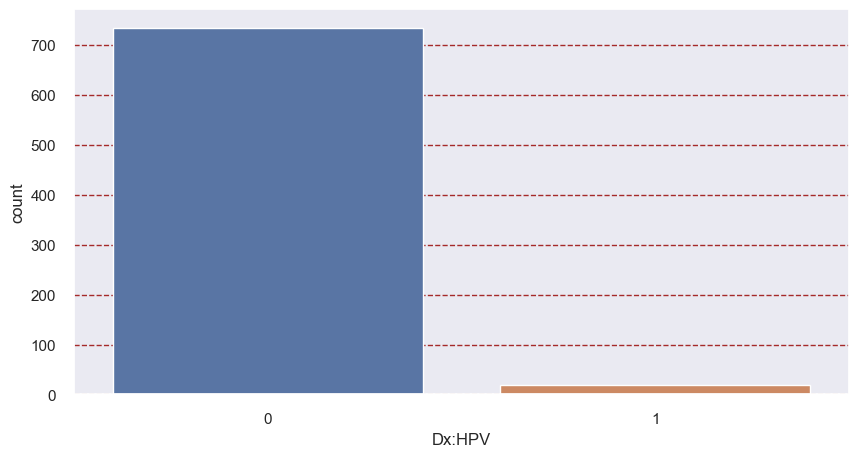

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))

# count plot on two categorical variable
sns.countplot(x ='Dx:HPV', data = cancer_df, ax = ax)
 
# Show the plot
plt.show();

In [31]:
positive = cancer_df[cancer_df['Dx:Cancer'] == 1]
positive

,Age,Age Group,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
3,52,50-60,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0
8,45,40-50,1,20,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,1,0,0,0,0
23,40,40-50,1,20,2,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,1,1,0,1
64,38,30-40,2,15,4,0,0,0,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,1,0,1
188,27,20-30,5,19,2,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,1,0,0,1,0
335,29,20-30,2,18,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,1,0,1,1,1
432,31,30-40,3,19,1,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,0,1,0,0,0,0
578,19,10-20,1,18,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,1,1,1,1,1
610,21,20-30,2,18,3,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,1,1,1,0,1
669,38,30-40,3,22,2,0,0,0,1,3,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,1,0,1,0,0


In [32]:
cancer_df.groupby("Age Group")[["Smokes"]].count()

,Smokes
Age Group,
10-20,147
20-30,343
30-40,200
40-50,54
50-60,5
70-80,3
80-90,1


In [33]:
cancer_df[(cancer_df["Age Group"] == '10-20')]["Smokes"]

0      0
1      0
169    0
340    0
344    0
      ..
811    0
812    0
819    0
845    0
850    0
Name: Smokes, Length: 147, dtype: int32

In [34]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 753 non-null    int64 
 1   Age Group                           753 non-null    object
 2   Number of sexual partners           753 non-null    int32 
 3   First sexual intercourse            753 non-null    int32 
 4   Num of pregnancies                  753 non-null    int32 
 5   Smokes                              753 non-null    int32 
 6   Smokes (years)                      753 non-null    int32 
 7   Smokes (packs/year)                 753 non-null    int32 
 8   Hormonal Contraceptives             753 non-null    int32 
 9   Hormonal Contraceptives (years)     753 non-null    int32 
 10  IUD                                 753 non-null    int32 
 11  IUD (years)                         753 non-null    int32 

In [35]:
col_lst = [5, 8, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 29, 30, 31, 32, 33, 34, 35, 36]
for i in col_lst:
    print(cancer_df.iloc[:, i].value_counts(),"\n")

0    646
1    107
Name: Smokes, dtype: int64 

1    485
0    268
Name: Hormonal Contraceptives, dtype: int64 

0    670
1     83
Name: IUD, dtype: int64 

0    674
1     79
Name: STDs, dtype: int64 

0    709
1     44
Name: STDs:condylomatosis, dtype: int64 

0    753
Name: STDs:cervical condylomatosis, dtype: int64 

0    749
1      4
Name: STDs:vaginal condylomatosis, dtype: int64 

0    710
1     43
Name: STDs:vulvo-perineal condylomatosis, dtype: int64 

0    735
1     18
Name: STDs:syphilis, dtype: int64 

0    752
1      1
Name: STDs:pelvic inflammatory disease, dtype: int64 

0    752
1      1
Name: STDs:genital herpes, dtype: int64 

0    752
1      1
Name: STDs:molluscum contagiosum, dtype: int64 

0    753
Name: STDs:AIDS, dtype: int64 

0    735
1     18
Name: STDs:HIV, dtype: int64 

0    752
1      1
Name: STDs:Hepatitis B, dtype: int64 

0    751
1      2
Name: STDs:HPV, dtype: int64 

0    735
1     18
Name: Dx:Cancer, dtype: int64 

0    745
1      8
Name: Dx:CIN, dtype

<AxesSubplot:>

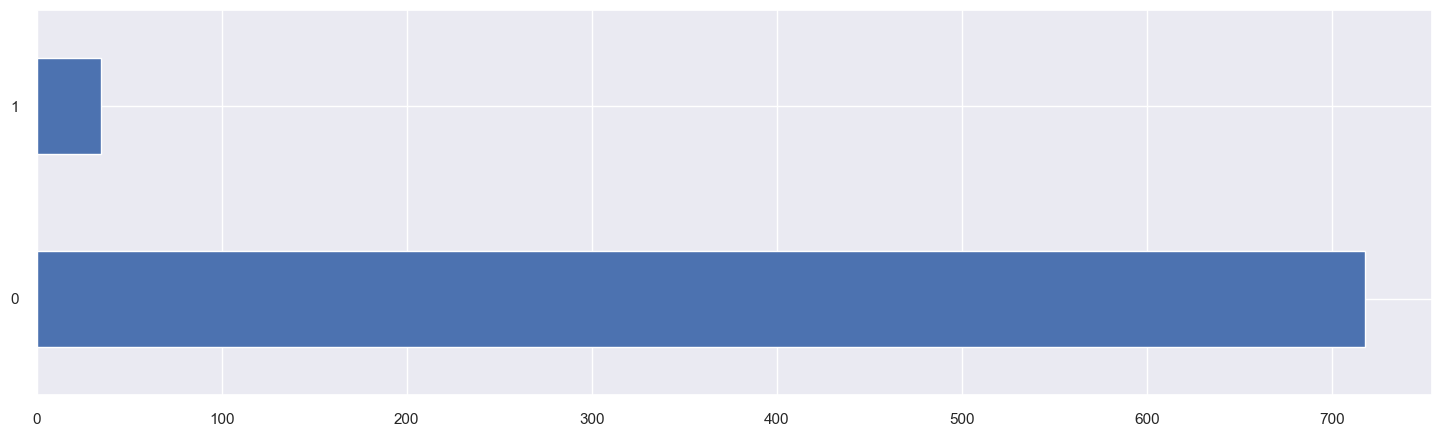

In [96]:
ax = cancer_df["Hinselmann"].value_counts().plot(kind = 'barh')
ax

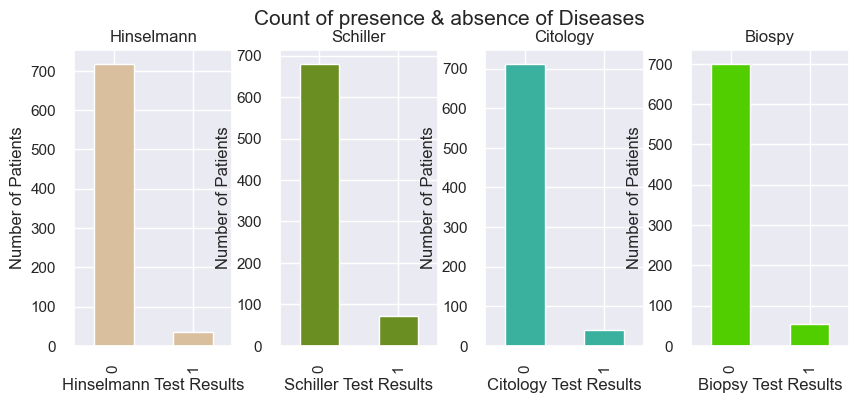

In [112]:
fig_Demo, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,4))
fig_Demo.suptitle('Count of presence & absence of Diseases', fontsize = 15, y = 0.95)
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.85, wspace=0.3, hspace=0.29)

# [1]
#cancer_df["Hinselmann"].plot(ax = ax[0, 0], kind = 'bar', grid = True, color = "#51ce00")
cancer_df["Hinselmann"].value_counts().plot(ax = ax1, kind = 'bar', grid = True, color = "#d9bf9e")
#ax[0, 0].plot(pivot_gend_A.Visit_A, pivot_gend_A.BMI_fem, label = 'Female', linestyle="-.", color = "#f0dc82")
ax1.set_title('Hinselmann')

#plt.setp(ax, xticks=[0, 1], xticklabels=["Absence", "Presence"])
#ax[0, 0].set_xticks(["Absence", "Presence"])

#ax[0, 0].set_yticks(range(23, 28))
ax1.set_xlabel('Hinselmann Test Results')
ax1.set_ylabel('Number of Patients')
#ax[0, 0].title.set_position([.5, 1.1])
ax1.grid(zorder = 0)


# [2]
cancer_df["Schiller"].value_counts().plot(ax = ax2, kind = 'bar', grid = True, color = "#6b8e23")
#ax[0, 0].plot(pivot_gend_A.Visit_A, pivot_gend_A.BMI_fem, label = 'Female', linestyle="-.", color = "#f0dc82")
ax2.set_title('Schiller')

#plt.setp(ax, xticks=[0, 1], xticklabels=["Absence", "Presence"])
#ax[0, 0].set_xticks(["Absence", "Presence"])

#ax[0, 0].set_yticks(range(23, 28))
ax2.set_xlabel('Schiller Test Results')
ax2.set_ylabel('Number of Patients')
#ax[0, 0].title.set_position([.5, 1.1])
ax2.grid(zorder = 0)


# [3]
cancer_df["Citology"].value_counts().plot(ax = ax3, kind = 'bar', grid = True, color = "#3ab09e")
#ax[0, 0].plot(pivot_gend_A.Visit_A, pivot_gend_A.BMI_fem, label = 'Female', linestyle="-.", color = "#f0dc82")
ax3.set_title('Citology')

#plt.setp(ax, xticks=[0, 1], xticklabels=["Absence", "Presence"])
#ax[0, 0].set_xticks(["Absence", "Presence"])

#ax[0, 0].set_yticks(range(23, 28))
ax3.set_xlabel('Citology Test Results')
ax3.set_ylabel('Number of Patients')
#ax[0, 0].title.set_position([.5, 1.1])
ax3.grid(zorder = 0)


# [4]
cancer_df["Biopsy"].value_counts().plot(ax = ax4, kind = 'bar', grid = True, color = "#51ce00")
#ax[0, 0].plot(pivot_gend_A.Visit_A, pivot_gend_A.BMI_fem, label = 'Female', linestyle="-.", color = "#f0dc82")
ax4.set_title('Biospy')

#plt.setp(ax, xticks=[0, 1], xticklabels=["Absence", "Presence"])
#ax[0, 0].set_xticks(["Absence", "Presence"])

#ax[0, 0].set_yticks(range(23, 28))
ax4.set_xlabel('Biopsy Test Results')
ax4.set_ylabel('Number of Patients')
#ax[0, 0].title.set_position([.5, 1.1])
ax4.grid(zorder = 0)



plt.show();

**We can observe from the frequency tables that STDs like cervical condylomatosis, vaginal condylomatosis, pelvic inflammatory disease, genital herpes, molluscum contagiosum, AIDS, Hepatitis B & HPV has no effect on a patient's status of being affected by Cervical Cancer.**

In [36]:
no_std_df = cancer_df.drop(['STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:Hepatitis B', 'STDs:HPV'], axis=1)
no_std_df

,Age,Age Group,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,10-20,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,10-20,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,30-40,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,50-60,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,40-50,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,30-40,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,30-40,2,19,1,0,0,0,1,8,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,20-30,2,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,30-40,2,24,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [37]:
canc_count = pd.DataFrame(no_std_df[no_std_df["Dx:Cancer"] == 1][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].sum())
size = no_std_df[no_std_df["Dx:Cancer"] == 1][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].shape[0]

# % of patients, out of all patients having some Cancer that are classified to possess cervical cancer by each test.
canc_count.columns = ["Count"]
canc_count["Percentage %"] = (canc_count["Count"]/size)*100
canc_count

,Count,Percentage %
Hinselmann,4,22.222222
Schiller,7,38.888889
Citology,4,22.222222
Biopsy,6,33.333333


This tells us that **Hinselmann** tests shows that **22.22%** of patients already affected by **some other cancer** also has **_cervical cancer_**.
Similarly, **Schiller** shows nearly **39%**, **Citology** shows **22.22%** & **Biopsy** shows **33.33%** of patients to be affected by **_cervical cancer_.**

In [38]:
smoker_count = pd.DataFrame(no_std_df[no_std_df["Smokes"] == 1][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].sum())
size = no_std_df[no_std_df["Smokes"] == 1][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].shape[0]

# % of patients, out of all patients having some Cancer that are classified to possess cervical cancer by each test.
smoker_count.columns = ["Count"]
smoker_count["Percentage %"] = (smoker_count["Count"]/size)*100
smoker_count

,Count,Percentage %
Hinselmann,7,6.542056
Schiller,15,14.018692
Citology,5,4.672897
Biopsy,10,9.345794


This tells us that **Hinselmann** tests shows that **6.5%** of patients who **SMOKES** has **_cervical cancer_**.
Similarly, **Schiller** shows nearly **14%**, **Citology** shows **4.6%** & **Biopsy** shows **9%** of patients to be affected by **_cervical cancer_.**

In [39]:
contra_count = pd.DataFrame(no_std_df[no_std_df["Hormonal Contraceptives"] == 1][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].sum())
size = no_std_df[no_std_df["Hormonal Contraceptives"] == 1][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].shape[0]

# % of patients, out of all patients having some Cancer that are classified to possess cervical cancer by each test.
contra_count.columns = ["Count"]
contra_count["Percentage %"] = (contra_count["Count"]/size)*100
contra_count

,Count,Percentage %
Hinselmann,25,5.154639
Schiller,46,9.484536
Citology,25,5.154639
Biopsy,34,7.010309


This tells us that **Hinselmann** tests shows that **nearly 5%** of patients who **uses Hormonal Contraceptives** has **_cervical cancer_**.
Similarly, **Schiller** shows nearly **9.5%**, **Citology** shows **5%** & **Biopsy** shows **7%** of patients to be affected by **_cervical cancer_.**

In [40]:
smok_years_count = pd.DataFrame(no_std_df[no_std_df["Smokes (years)"] > 0][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].sum())
size = no_std_df[no_std_df["Smokes (years)"] > 0][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].shape[0]

# % of patients, out of all patients having some Cancer that are classified to possess cervical cancer by each test.
smok_years_count.columns = ["Count"]
smok_years_count["Percentage %"] = (smok_years_count["Count"]/size)*100
smok_years_count

,Count,Percentage %
Hinselmann,6,5.825243
Schiller,15,14.563107
Citology,5,4.854369
Biopsy,10,9.708738


This tells us that **Hinselmann** tests shows that nearly **6%** of patients who  has **SMOKED for more than a year** has **_cervical cancer_**.
Similarly, **Schiller** shows nearly **14.5%**, **Citology** shows **nearly 5%** & **Biopsy** shows **nearly 10%** of patients to be affected by **_cervical cancer_.**

In [41]:
IUD_count = pd.DataFrame(no_std_df[no_std_df["IUD"] == 1][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].sum())
size = no_std_df[no_std_df["IUD"] == 1][['Hinselmann', 'Schiller', 'Citology', 'Biopsy']].shape[0]

# % of patients, out of all patients having some Cancer that are classified to possess cervical cancer by each test.
IUD_count.columns = ["Count"]
IUD_count["Percentage %"] = (IUD_count["Count"]/size)*100
IUD_count

,Count,Percentage %
Hinselmann,6,7.228916
Schiller,14,16.867470
Citology,5,6.024096
Biopsy,9,10.843373


This tells us that **Hinselmann** tests shows that nearly **7%** of patients who  has **used IUDs** has **_cervical cancer_**.
Similarly, **Schiller** shows nearly **17%**, **Citology** shows **6%** & **Biopsy** shows **nearly 11%** of patients to be affected by **_cervical cancer_.**

In [42]:
no_std_df

,Age,Age Group,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,10-20,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,10-20,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,30-40,1,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,50-60,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,40-50,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,30-40,3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,30-40,2,19,1,0,0,0,1,8,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,20-30,2,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,30-40,2,24,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0


2     253
3     188
1     183
4      67
5      43
6       7
7       5
8       4
15      1
28      1
9       1
Name: Number of sexual partners, dtype: int64

<AxesSubplot:xlabel='Number of sexual partners'>

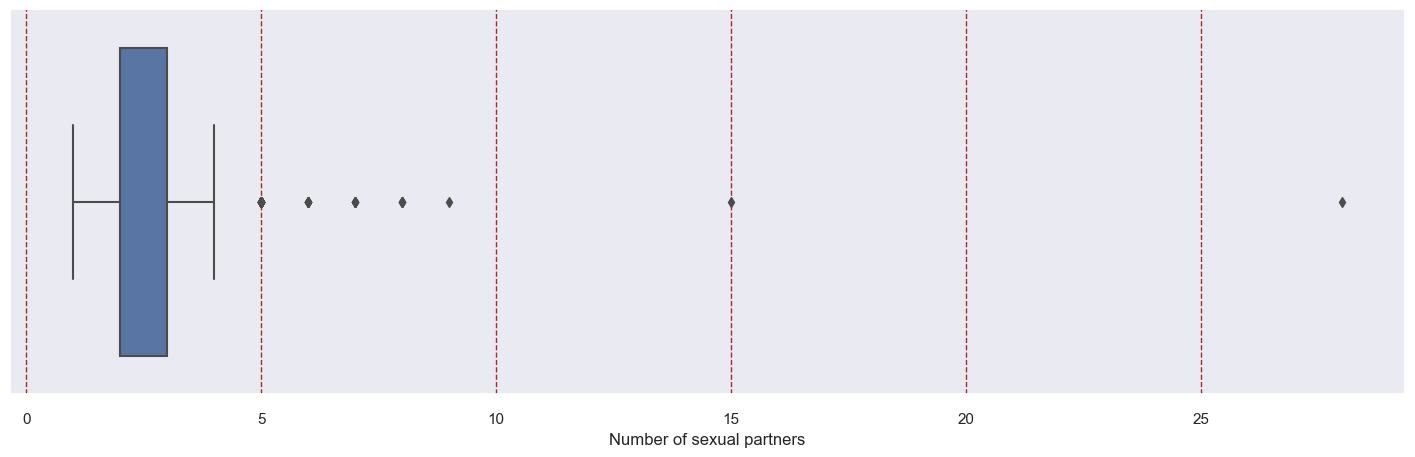

In [43]:
no_std_df["Number of sexual partners"].value_counts()
sns.boxplot(no_std_df["Number of sexual partners"])

In [44]:
#create 3 categ. no. of sexual partners = 1, 2<=x<=4, >4

In [45]:
partner_df = no_std_df.copy()

In [46]:
partner_df["NOSP Type"] = "A"
partner_df.loc[(partner_df['Number of sexual partners'] <= 4) & (partner_df['Number of sexual partners'] >=2), 'NOSP Type'] = "B"
partner_df.loc[partner_df['Number of sexual partners'] > 4, 'NOSP Type'] = "C"

partner_categ_col = partner_df["NOSP Type"]
partner_df.insert(loc=3,
                 column= 'NOSP type',
                 value= partner_categ_col)

partner_df.drop(['NOSP Type'], axis=1, inplace=True)
partner_df

,Age,Age Group,Number of sexual partners,NOSP type,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,10-20,4,B,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,10-20,1,A,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,30-40,1,A,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,50-60,5,C,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,40-50,3,B,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,30-40,3,B,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
854,32,30-40,2,B,19,1,0,0,0,1,8,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0
855,25,20-30,2,B,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,1,0
856,33,30-40,2,B,24,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [47]:
partner_df["NOSP type"].value_counts()

B    508
A    183
C     62
Name: NOSP type, dtype: int64

In [48]:
partner_df[partner_df["Biopsy"] == 0]["NOSP type"].value_counts()

B    472
A    171
C     57
Name: NOSP type, dtype: int64

#### CRAMER V value to determine association between no of sexual partners & Cervical cancer test results.

There's no association: 

> cramerV(data1)  #Hinselmann vs NOSP
Cramer V 
 0.04567 

> cramerV(data2)  #Schiller vs NOSP
Cramer V 
 0.03551 

> cramerV(data3)  #Citology vs NOSP
Cramer V 
   0.056 

> cramerV(data4)  #Biopsy vs NOSP
Cramer V 
 0.01486 

In [49]:
no_std_df[no_std_df["Schiller"] == 1]["IUD (years)"].value_counts()

0     60
3      6
6      2
7      1
19     1
2      1
11     1
1      1
Name: IUD (years), dtype: int64

In [50]:
no_std_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 753 non-null    int64 
 1   Age Group                           753 non-null    object
 2   Number of sexual partners           753 non-null    int32 
 3   First sexual intercourse            753 non-null    int32 
 4   Num of pregnancies                  753 non-null    int32 
 5   Smokes                              753 non-null    int32 
 6   Smokes (years)                      753 non-null    int32 
 7   Smokes (packs/year)                 753 non-null    int32 
 8   Hormonal Contraceptives             753 non-null    int32 
 9   Hormonal Contraceptives (years)     753 non-null    int32 
 10  IUD                                 753 non-null    int32 
 11  IUD (years)                         753 non-null    int32 

In [51]:
predictor_df = no_std_df.drop(["Age Group", "Number of sexual partners", "First sexual intercourse", "Smokes (years)", "Smokes (packs/year)", "Hormonal Contraceptives (years)", "IUD (years)", "STDs (number)", "STDs: Number of diagnosis", "STDs: Time since first diagnosis", "STDs: Time since last diagnosis", "Hinselmann", "Schiller", "Citology", "Biopsy"], axis=1)
predictor_df

,Age,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1,0,0,0,0,0,0,0,0,0,0,0,0
3,52,4,1,1,0,0,0,0,0,0,1,0,1,0
4,46,4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,0,0,0,0,0,0,0,0,0,0,0,0,0
854,32,1,0,1,0,0,0,0,0,0,0,0,0,0
855,25,0,0,1,0,0,0,0,0,0,0,0,0,0
856,33,2,0,1,0,0,0,0,0,0,0,0,0,0


val_lst_2 = []
for i in demo_cc_data.columns:
  val = demo_cc_data[i][demo_cc_data[i] == '?'].count()
  val_lst_2.append(val)
  ## val = 0

fig_2 = sns.barplot(x = cancer_df.columns, y = val_lst_2, color = "red")
sns.set(rc={"figure.figsize":(18, 5)})
fig_2.set_title('Missing Values Count', fontdict={'size': 22, 'weight': 'bold'})
fig_2.set_xlabel('Variables', fontdict={'size': 15})
fig_2.set_ylabel('Frequency', fontdict={'size': 15})

for item in fig_2.get_xticklabels():
    item.set_rotation(90)

fig_2.bar_label(fig_2.containers[0]);

## Modelling:

### Splitting the dataset into test & train.

In [59]:
# Select Predictors
feature = predictor_df

# Select Target
target = no_std_df['Hinselmann']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (602, 14)
Shape of testing feature: (151, 14)
Shape of training label: (602,)
Shape of testing label: (151,)


#### Helper function to evaluate all models after creation:

In [55]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Decision Tree

In [56]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

DecisionTreeClassifier(random_state=0)

Accuracy: 0.9602649006622517
Precision: 0.5
Recall: 0.16666666666666666
F1 Score: 0.25
Cohens Kappa Score: 0.23479729729729726
Area Under Curve: 0.6247126436781608
Confusion Matrix:
 [[144   1]
 [  5   1]]


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

RandomForestClassifier(random_state=0)

Accuracy: 0.9602649006622517
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6327586206896552
Confusion Matrix:
 [[145   0]
 [  6   0]]


### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

GaussianNB()

Accuracy: 0.7947019867549668
Precision: 0.12121212121212122
Recall: 0.6666666666666666
F1 Score: 0.20512820512820512
Cohens Kappa Score: 0.14782450391407254
Area Under Curve: 0.689080459770115
Confusion Matrix:
 [[116  29]
 [  2   4]]


**F1 & Cohens Kappa Score are not used by us to evaluate the model.**

Will learn about it!

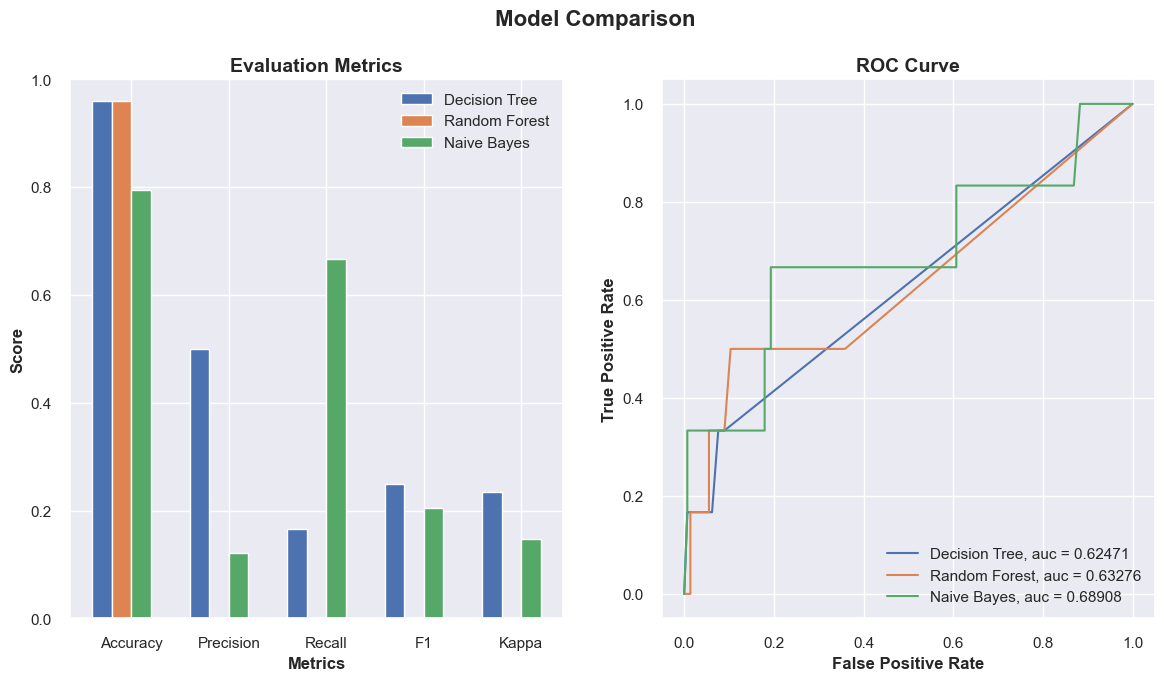

In [69]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
#knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
#ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
#ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show();